In [1]:
%matplotlib inline

In [2]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [17]:
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('Predicted label')
    ax.set_xlabel('Actual label')

In [4]:
# importing our favorite libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [6]:
#df_p = pd.read_excel (r'C:\Users\vince\Desktop\Jupiter\DMV_Crash_Data_Bool.xlsx', skip_header = True)
df_p = pd.read_excel (r'C:\Users\hp\OneDrive - UNSW\Honours student Sai\Vincent\Final_Data\DMV_Crash_Data_Bool.xlsx', skip_header = True)

#print(df_p.head())
print((df_p).shape)

(259, 39)


In [7]:
filtered_df = (df_p["vehicle type"], df_p["Number for Road Type"], df_p["Intersection"],
    df_p["Intersection Geometry"], df_p["Parking provision"], df_p["Mode"],
    df_p["Vehicle1 Status"], df_p["Fault"], df_p["NO. for collision type"],
    df_p["InjuriesBool"], df_p["Vehicle1 Damage"], df_p["Vehicle2 Damage"], df_p["signal"])
df_p = pd.DataFrame(data = filtered_df)
print(type(df_p))
#print(df_p.head())
df_p = df_p.transpose()
print(type(df_p))
#print(df_p)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
#remove Na values

df_R = df_p.dropna(axis=0) #axis=0 
#Determine if rows or columns which contain missing values are removed.
#0, or ‘index’ : Drop rows which contain missing values.
print((df_R).shape)
#print(df_R.head())

(202, 13)


In [10]:
X_df = (df_R["vehicle type"], df_R["Number for Road Type"], df_R["Intersection"],
    df_R["Intersection Geometry"], df_R["Parking provision"], df_R["Mode"],
    df_R["Vehicle1 Status"], df_R["Fault"], df_R["NO. for collision type"],
    df_R["Vehicle1 Damage"], df_R["Vehicle2 Damage"], df_R["signal"])
print(type(X_df))
print(len(X_df))
X_np= np.asarray(X_df)
print(type(X_np))
print((X_np).shape)
X_np= np.transpose(X_df)
print(type(X_np))
print((X_np).shape)

<class 'tuple'>
12
<class 'numpy.ndarray'>
(12, 202)
<class 'numpy.ndarray'>
(202, 12)


In [31]:
my_features = ["vehicle type", "Road Type", "Intersection",
    "Intersection Geometry", "Parking provision", "Mode",
    "Vehicle1 Status", "Fault", "Collision type",
    "Vehicle1 Damage", "Vehicle2 Damage", "Signalized"]

In [32]:
#Please enter the dependent variables
Y_df = (df_R["InjuriesBool"])
print(type(Y_df))
print(len(Y_df))
Y_np= np.asarray(Y_df)
print(type(Y_np))
print((Y_np).shape)
Y_np= np.transpose(Y_df)
print(type(Y_np))
print((Y_np).shape)

<class 'pandas.core.series.Series'>
202
<class 'numpy.ndarray'>
(202,)
<class 'pandas.core.series.Series'>
(202,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, 
                                                    test_size=0.20, 
                                                    random_state=42, stratify = Y_np)

In [34]:
my_class = ["No Injury",  "Injury"]

In [35]:
#finding class weight
class_weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])
class_weight

5

Bagging classifier performance:
Balanced accuracy: 0.65 - Geometric mean 0.57
F1 Score: 0.4444444444444444
[[34  1]
 [ 4  2]]



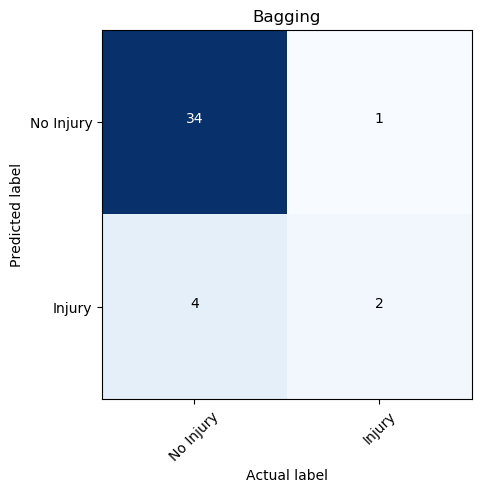

In [36]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20, random_state=0) #choose the parameter and keep random_state=0
#random state default=None
bagging.fit(X_train, y_train)
y_pred_bc = bagging.predict(X_test)


print('Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bc),
              geometric_mean_score(y_test, y_pred_bc)))
print("F1 Score: " + str(f1_score(y_test,y_pred_bc)))
cm_bagging = confusion_matrix(y_test, y_pred_bc)
fig, ax = plt.subplots(ncols=1)
plot_confusion_matrix(cm_bagging, classes=my_class, ax=ax,
                      title='Bagging')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


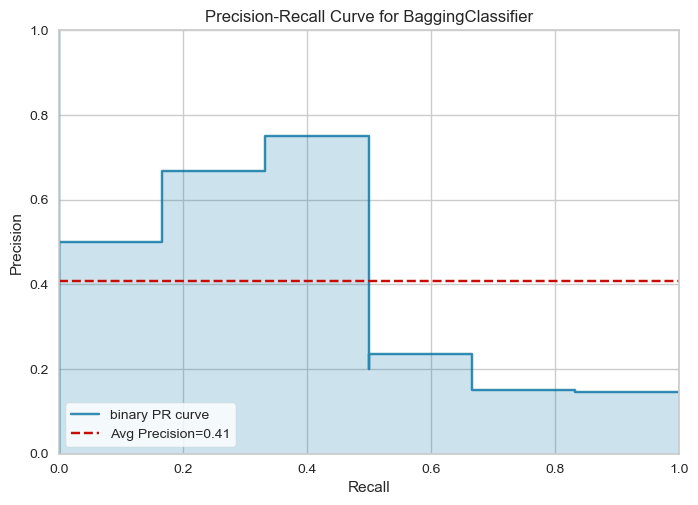

In [62]:
#Precision Recall curve
import matplotlib.pyplot as plt

from yellowbrick.datasets import load_spam
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(bagging)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


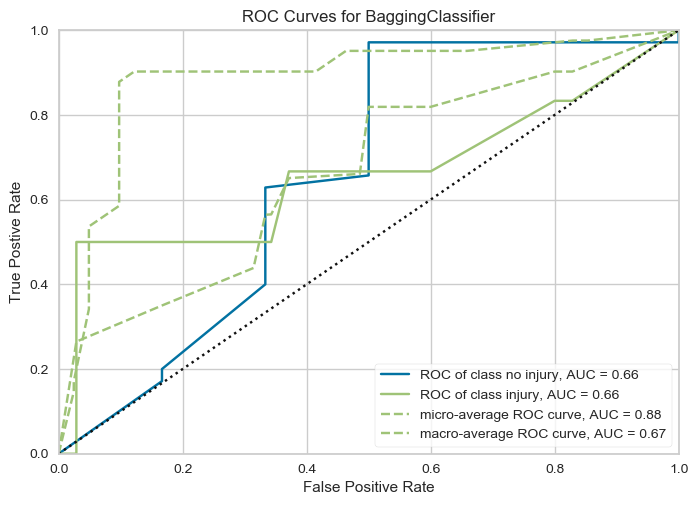

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam


visualizer = ROCAUC(bagging, classes=["no injury", "injury"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

In [38]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris


clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, random_state=0)
clf.fit(X_train, y_train)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

In [39]:
feature_importances

array([0.12363233, 0.09786699, 0.04496153, 0.13443742, 0.05374194,
       0.05132366, 0.07388021, 0.01450964, 0.0980702 , 0.11974462,
       0.11038184, 0.07744962])

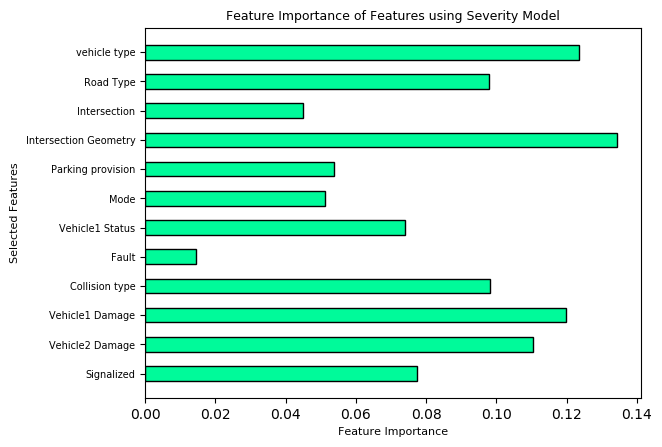

In [61]:


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features = my_features
y_pos = np.arange(len(features))
#performance = 3 + 10 * np.random.rand(len(features))
#error = np.random.rand(len(features))

ax.barh(y_pos, feature_importances, color = 'mediumspringgreen', edgecolor = "black", height = 0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(features, fontsize = 7)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance', fontsize = 8)
ax.set_ylabel('Selected Features', fontsize = 8)
ax.set_title('Feature Importance of Features using Severity Model', fontsize = 9)

plt.show()